## IBM Applied Data Science Capstone Project

### Opening a New Gym in Austin, TX

### Introduction:

Located in Central Texas within the greater Texas Hill Country, it is home to numerous lakes, rivers, and waterways. Austin was recently voted the No. 1 place to live in America. It was also named the fastest growing large city in the U.S.A. Austin and its suburb has an estimated population of 2.20 MM. Austin is a hotbed for technology, startups and innovation. A number of Fortune 500 companies have headquarters or regional offices in Austin, including Dell, 3M, Amazon, Apple, Google, IBM, Intel, Oracle, Texas Instruments, and Whole Foods Market.  

People in the city are affluent, health conscious and willing to spend high dollar to take care of their wellbeing. That's why I have selected Austin for my project to open a new gymnasium.


### Business Problem:

The objective of this project is to analyze and identify a suitable location in Austin, TX that will have a  good potential to open a new Gym. It is extremely important to choose an appropriate location where there is less or no Gym at all to ensure the success of the new Gym. Using Data Science Methodology and Machine Learning techniques like clustering, we should be able to determine that.


### Target Audience:

Anyohttp://localhost:8888/notebooks/Documents/IBM%20Data%20Science/Capstone/Capstone%20Peer%20Graded%20Assignment.ipynb#Data-Description:ne who is looking to open a new Gym in the Austin, TX area is a target audience. Whether a single location for an individual entrepreneur or multiple locations for a big business, it’s a good investment to fulfill the health and well being needs of a modern, health concious population. 


## Data Description:

### Data Required

1. List of Neighborhoods in Austin, TX. This defines the scope of the project, which is confined to the city of
Austin, TX.
2. Latitude and the Longitude of the Neighborhoods. This is required to plot the map and get the venues.
3. Venue data, specifically related to Gym. This data will be used to perform Clustering of the
neighborhoods.

### Sources and Methods to Extract Data

From Wikipedia ('https://en.wikipedia.org/wiki/List_of_Austin_neighborhoods') ) we'll extract and scrape Austin
Neighborhood data using various Python commands. Next, we will get the geographical coordinates of the neighborhoods by using Python Geocoder library and that will give us data of the Latitude and the Longitude for the Neighborhoods. With a list of Neighborhoods and their Latitudes and Longitudes, we’ll use Foursquare API to get venue information and we’ll select the Gym category for further analysis. We’ll be using K-mean Clustering (Machine Learning Technique) to determine suitable locations for our new business as well as Folium library to locate them in the Map. The processing of data will help us identify which neighborhoods has less concentration of Gyms, therefore, indicating a suitable location to open a new one.


### 1. Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

# uncomment this line if you haven'tcompleted the Foursquare API lab
!conda install -c conda-forge geopy --yes

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!pip install geocoder
import geocoder

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.



usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


### 2. Scrap data from Wikipedia page into a DataFrame

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_Austin_neighborhoods'

In [3]:
df1 = pd.read_html(url, header = None)

In [4]:
df = df1[0]
df= df.drop(columns=['COA ID#[nb 1]'])

In [5]:
df_austin=df.rename(columns={'Name':'Neighborhood'})
df_austin.head()

,Neighborhood
0,Bryker Woods
1,Caswell Heights
2,Downtown Austin
3,Eastwoods
4,Hancock


### 3. Get the geographical coordinates

In [6]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Austin, TX'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [7]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [get_latlng(neighborhood) for neighborhood in df_austin["Neighborhood"].tolist()]

In [8]:
coords[:5]

[[30.305015660387273, -97.75420440854235],
 [30.307883086657483, -97.71940278965468],
 [30.271220062178976, -97.75418003332545],
 [30.290490000000034, -97.73166999999995],
 [30.297150000000045, -97.72661999999997]]

In [9]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df_coords.head()

,Latitude,Longitude
0,30.305016,-97.754204
1,30.307883,-97.719403
2,30.271220,-97.754180
3,30.290490,-97.731670
4,30.297150,-97.726620


In [10]:
# merge the coordinates into the original dataframe
df_austin['Latitude'] = df_coords['Latitude']
df_austin['Longitude'] = df_coords['Longitude']

In [11]:
df_austin.head()

,Neighborhood,Latitude,Longitude
0,Bryker Woods,30.305016,-97.754204
1,Caswell Heights,30.307883,-97.719403
2,Downtown Austin,30.271220,-97.754180
3,Eastwoods,30.290490,-97.731670
4,Hancock,30.297150,-97.726620


In [12]:
df_austin.shape

(22, 3)

In [13]:
# save the DataFrame as CSV file
df_austin.to_csv("df_austin.csv", index=False)

### 4. Create a map of Austin with neighborhoods superimposed on top

In [14]:
address = 'Austin, TX, USA'
geolocator = Nominatim(user_agent="austin_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Austin are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Austin are 30.2711286, -97.7436995.


In [15]:
map_austin = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, label in zip(df_austin['Latitude'], df_austin['Longitude'], df_austin['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='green',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7).add_to(map_austin) 
    
map_austin

### 5. Use the Foursquare API to explore the neighborhoods

In [16]:
CLIENT_ID = 'HIDWTSRI3RZT13JAIDYJVWNSVFGYLSKM4PUK5OZZLT2MBTNM' # your Foursquare ID
CLIENT_SECRET = 'YTXYRGQIRIBKKCOT4MTWPPIKFR1DMYU5OTKYYT2PADSRWAYX' # your Four square Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HIDWTSRI3RZT13JAIDYJVWNSVFGYLSKM4PUK5OZZLT2MBTNM
CLIENT_SECRET:YTXYRGQIRIBKKCOT4MTWPPIKFR1DMYU5OTKYYT2PADSRWAYX


In [17]:
# save the map as HTML file
map_austin.save('map_austin.html')

#### Now, let's get the top 100 venues that are within a radius of 2000 meters.

In [18]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(df_austin['Latitude'], df_austin['Longitude'], df_austin['Neighborhood']):
    
# create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
# make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
# return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [19]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)
# venues_df.head()
# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1868, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Bryker Woods,30.305016,-97.754204,Kerbey Lane Café,30.308030,-97.750470,Café
1,Bryker Woods,30.305016,-97.754204,Tiny Boxwoods,30.306058,-97.749789,American Restaurant
2,Bryker Woods,30.305016,-97.754204,Anderson's Coffee Co,30.308382,-97.750355,Coffee Shop
3,Bryker Woods,30.305016,-97.754204,Austin Flower Company,30.307787,-97.751224,Flower Shop
4,Bryker Woods,30.305016,-97.754204,Olive & June,30.307450,-97.751046,Italian Restaurant


### Let's check how many venues were returned for each neighorhood

In [20]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Bryker Woods,100,100,100,100,100,100
Caswell Heights,100,100,100,100,100,100
Downtown Austin,100,100,100,100,100,100
Eastwoods,100,100,100,100,100,100
Hancock,100,100,100,100,100,100
Heritage,85,85,85,85,85,85
Hyde Park,100,100,100,100,100,100
Lower Waller Creek,100,100,100,100,100,100
North University,100,100,100,100,100,100


In [21]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 194 uniques categories.


In [22]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Café', 'American Restaurant', 'Coffee Shop', 'Flower Shop',
       'Italian Restaurant', 'Veterinarian', 'Cosmetics Shop',
       'Recreation Center', 'Sandwich Place', 'Burger Joint',
       'Yoga Studio', 'Breakfast Spot', 'Pharmacy', 'Ice Cream Shop',
       'BBQ Joint', 'Bank', 'Brewery', 'Gourmet Shop', 'Bridal Shop',
       'History Museum', 'Trail', 'Sushi Restaurant', 'Gastropub',
       'Pizza Place', 'Burrito Place', 'Park', 'New American Restaurant',
       'Japanese Restaurant', 'Taco Place', 'Grocery Store', 'Gift Shop',
       'Juice Bar', 'Vegetarian / Vegan Restaurant', 'Music Venue', 'Bar',
       'Bakery', 'Tea Room', 'Spa', 'Deli / Bodega', 'Gun Shop',
       'Mexican Restaurant', 'Pet Store', 'Food Truck', 'Bookstore',
       'Dessert Shop', 'Community Center', 'Art Gallery',
       'Middle Eastern Restaurant', 'Shoe Store', 'Hookah Bar'],
      dtype=object)

In [23]:
# check if the results contain "Gym"
"Gym" in venues_df['VenueCategory'].unique()

True

### 6. Analyze Each Neighborhood

In [24]:
# one hot encoding
austin_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
austin_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [austin_onehot.columns[-1]] + list(austin_onehot.columns[:-1])

austin_onehot = austin_onehot[fixed_columns]

print(austin_onehot.shape)
austin_onehot

(1868, 195)


,Neighborhoods,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bryker Woods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bryker Woods,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bryker Woods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bryker Woods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bryker Woods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,West Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1864,West Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1865,West Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1866,West Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
austin_grouped = austin_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(austin_grouped.shape)
austin_grouped.head()

(21, 195)


,Neighborhoods,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bryker Woods,0.02,0.02,0.00,0.0,0.0,0.00,0.02,0.00,0.02,...,0.01,0.00,0.00,0.00,0.0,0.01,0.00,0.00,0.0,0.02
1,Caswell Heights,0.02,0.02,0.00,0.0,0.0,0.01,0.01,0.00,0.03,...,0.00,0.01,0.01,0.02,0.0,0.00,0.01,0.01,0.0,0.01
2,Downtown Austin,0.03,0.00,0.00,0.0,0.0,0.00,0.01,0.00,0.01,...,0.00,0.00,0.00,0.00,0.0,0.00,0.01,0.00,0.0,0.03
3,Eastwoods,0.04,0.00,0.02,0.0,0.0,0.00,0.01,0.01,0.02,...,0.00,0.01,0.00,0.00,0.0,0.00,0.00,0.01,0.0,0.00
4,Hancock,0.03,0.01,0.00,0.0,0.0,0.00,0.03,0.00,0.01,...,0.00,0.01,0.01,0.00,0.0,0.00,0.00,0.01,0.0,0.00


In [26]:
len(austin_grouped[austin_grouped["Gym"] > 0])

17

#### Create a new DataFrame for Gym data only

In [27]:
austin_gym = austin_grouped[["Neighborhoods","Gym"]]
austin_gym.head()

,Neighborhoods,Gym
0,Bryker Woods,0.01
1,Caswell Heights,0.01
2,Downtown Austin,0.03
3,Eastwoods,0.00
4,Hancock,0.01


### 7. Identify Optimal K for KMeans Algorithm by Elbow Method

In [28]:
Kmean_opt=austin_gym.drop(["Neighborhoods"], 1)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Kmean_opt)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\uddimoh1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\uddimoh1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\uddimoh1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


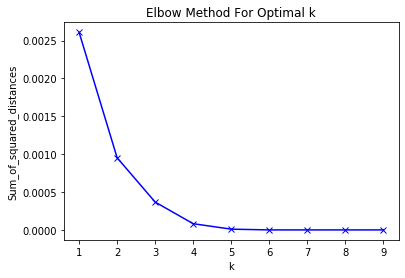

In [40]:
import matplotlib.pyplot as plt
plt.plot(K,Sum_of_squared_distances, 'bx-' )
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### 8. Cluster Neighborhoods

Run k-means to cluster the neighborhoods in Austin into 3 clusters.

In [30]:
# set number of clusters
kclusters = 3

austin_clustering = austin_gym.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(austin_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2])

In [31]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
austin_merged = austin_gym.copy()

# add clustering labels
austin_merged["Cluster Labels"] = kmeans.labels_

In [32]:
austin_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
austin_merged.head()

,Neighborhood,Gym,Cluster Labels
0,Bryker Woods,0.01,2
1,Caswell Heights,0.01,2
2,Downtown Austin,0.03,1
3,Eastwoods,0.00,2
4,Hancock,0.01,2


In [33]:
# merge austin_grouped with df_austin to add latitude/longitude for each neighborhood
austin_merged = austin_merged.join(df_austin.set_index("Neighborhood"), on="Neighborhood")

print(austin_merged.shape)
austin_merged.head() # check the last columns!

(21, 5)


,Neighborhood,Gym,Cluster Labels,Latitude,Longitude
0,Bryker Woods,0.01,2,30.305016,-97.754204
1,Caswell Heights,0.01,2,30.307883,-97.719403
2,Downtown Austin,0.03,1,30.271220,-97.754180
3,Eastwoods,0.00,2,30.290490,-97.731670
4,Hancock,0.01,2,30.297150,-97.726620


In [34]:
# sort the results by Cluster Labels
print(austin_merged.shape)
austin_merged.sort_values(["Cluster Labels"], inplace=True)
austin_merged

(21, 5)


,Neighborhood,Gym,Cluster Labels,Latitude,Longitude
13,Original Austin,0.048387,0,30.426610,-97.735050
10,Old Enfield,0.020000,1,30.286703,-97.765445
18,Rosedale,0.020000,1,30.312210,-97.747560
2,Downtown Austin,0.030000,1,30.271220,-97.754180
16,Ridgelea,0.020000,1,30.312298,-97.750826
5,Heritage,0.023529,1,30.285855,-97.771054
12,Old West Austin,0.020000,1,30.274750,-97.761260
17,Ridgetop,0.000000,2,30.418057,-97.900008
15,Pemberton Heights,0.010000,2,30.289814,-97.753361
14,Original West University,0.010000,2,30.288140,-97.747280


### Finally, let's visualize the resulting clusters

In [35]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(austin_merged['Latitude'], austin_merged['Longitude'], austin_merged['Neighborhood'], austin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [36]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

### 9. Examine Clusters

#### Cluster 0

In [37]:
austin_merged.loc[austin_merged['Cluster Labels'] == 0]

,Neighborhood,Gym,Cluster Labels,Latitude,Longitude
13,Original Austin,0.048387,0,30.42661,-97.73505


#### Cluster 1

In [38]:
austin_merged.loc[austin_merged['Cluster Labels'] == 1]

,Neighborhood,Gym,Cluster Labels,Latitude,Longitude
10,Old Enfield,0.020000,1,30.286703,-97.765445
18,Rosedale,0.020000,1,30.312210,-97.747560
2,Downtown Austin,0.030000,1,30.271220,-97.754180
16,Ridgelea,0.020000,1,30.312298,-97.750826
5,Heritage,0.023529,1,30.285855,-97.771054
12,Old West Austin,0.020000,1,30.274750,-97.761260


#### Cluster 2

In [41]:
austin_merged.loc[austin_merged['Cluster Labels'] == 2]

,Neighborhood,Gym,Cluster Labels,Latitude,Longitude
17,Ridgetop,0.00,2,30.418057,-97.900008
15,Pemberton Heights,0.01,2,30.289814,-97.753361
14,Original West University,0.01,2,30.288140,-97.747280
11,Old Pecan Street,0.00,2,30.271665,-97.637363
0,Bryker Woods,0.01,2,30.305016,-97.754204
9,Oakmont Heights,0.01,2,30.321616,-97.750731
8,North University,0.01,2,30.297030,-97.735770
7,Lower Waller Creek,0.00,2,30.262305,-97.731471
6,Hyde Park,0.01,2,30.308570,-97.728280
4,Hancock,0.01,2,30.297150,-97.726620


### Conclusions:
A moderate number of gyms are concentrated in the north west area of Austin city (cluster 1). The highest number of gyms are located in the northern part of the city (cluster 0). On the other hand, cluster 2 has very low number to totally no gym in the neighborhoods. This represents a great opportunity and high potential areas to open new gym(s) as there is very little to no competition from existing gyms. Meanwhile, gyms in cluster 0 are likely suffering from intense competition due to oversupply and high concentration of gyms. From another perspective, this also shows that the oversupply of gyms mostly exists in the northern area of the city, with near the downtown areas still have very a few gyms. Therefore, this project recommends gym developers to capitalize on these findings to open new gyms in neighborhoods in cluster 2 with little to no competition. Gym developers with unique selling propositions to stand out from the competition can also open new gyms in neighborhoods in cluster 1 with moderate competition. Lastly, gym developers are advised to avoid neighborhoods in cluster 3 which already have high concentration of gyms and suffering from intense competition.